# Data Preparation

## Import Libraries

In [156]:
import numpy as np
import pandas as pd

## Import Data

In [157]:
# loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')
df = pd.read_csv('loan_data_2007_2014.csv')

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore Data

In [4]:
pd.options.display.max_columns = None

In [5]:
df.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

In [7]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
import string

In [9]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a',str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')
df['emp_length_int'] = df['emp_length_int'].fillna(str(0))

df['emp_length_int']

0         10
1          0
2         10
3         10
4          1
5          3
6          8
7          9
8          4
9          0
10         5
11        10
12         0
13         3
14         3
15         0
16         4
17        10
18         1
19         6
20         3
21        10
22        10
23         5
24         1
25         2
26         9
27         2
28        10
29         0
          ..
466255     9
466256     0
466257    10
466258    10
466259     4
466260    10
466261     1
466262     0
466263    10
466264    10
466265     0
466266     3
466267     2
466268     6
466269    10
466270     9
466271     3
466272    10
466273     0
466274     8
466275     7
466276     5
466277     3
466278    10
466279     4
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length_int, Length: 466285, dtype: object

In [10]:
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'])
df['emp_length_int']

0         10
1          0
2         10
3         10
4          1
5          3
6          8
7          9
8          4
9          0
10         5
11        10
12         0
13         3
14         3
15         0
16         4
17        10
18         1
19         6
20         3
21        10
22        10
23         5
24         1
25         2
26         9
27         2
28        10
29         0
          ..
466255     9
466256     0
466257    10
466258    10
466259     4
466260    10
466261     1
466262     0
466263    10
466264    10
466265     0
466266     3
466267     2
466268     6
466269    10
466270     9
466271     3
466272    10
466273     0
466274     8
466275     7
466276     5
466277     3
466278    10
466279     4
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length_int, Length: 466285, dtype: int64

In [11]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
5         Nov-04
6         Jul-05
7         Jan-07
8         Apr-04
9         Sep-04
10        Jan-98
11        Oct-89
12        Apr-04
13        Jul-03
14        May-91
15        Sep-07
16        Oct-98
17        Aug-93
18        Oct-03
19        Jan-01
20        Nov-97
21        Feb-83
22        Jul-85
23        Apr-03
24        Jun-01
25        Feb-02
26        Oct-03
27        Oct-03
28        Aug-84
29        Nov-06
           ...  
466255    Sep-00
466256    Apr-01
466257    Jul-85
466258    Jun-93
466259    Apr-85
466260    Sep-97
466261    Aug-97
466262    Feb-93
466263    Jul-98
466264    Aug-03
466265    Jul-93
466266    Mar-94
466267    Oct-02
466268    Dec-01
466269    Apr-00
466270    Oct-86
466271    Dec-93
466272    Jun-01
466273    May-90
466274    Aug-83
466275    Nov-93
466276    Nov-94
466277    Jul-98
466278    Jun-02
466279    Aug-99
466280    Apr-03
466281    Jun-97
466282    Dec-

In [12]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

In [13]:
type(df['earliest_cr_line_date'][0]), df['earliest_cr_line_date'][0]

(pandas._libs.tslibs.timestamps.Timestamp, Timestamp('1985-01-01 00:00:00'))

In [14]:
df['months_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01')-df['earliest_cr_line_date'])/np.timedelta64(1,'M'))

In [15]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [16]:
df.loc[:,['earliest_cr_line','earliest_cr_line_date','months_since_earliest_cr_line']][df['months_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
3413,Jun-67,2067-06-01,-594.0
3607,Aug-67,2067-08-01,-596.0
3989,Dec-63,2063-12-01,-552.0
4440,Sep-68,2068-09-01,-609.0
4449,Sep-68,2068-09-01,-609.0


In [17]:
df['months_since_earliest_cr_line'][df['months_since_earliest_cr_line']<0] = df['months_since_earliest_cr_line'].max()

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [19]:
df['term'] = df['term'].str.replace(' months','')
df['term'] = pd.to_numeric(df['term'])
df['term']

0         36
1         60
2         36
3         36
4         60
5         36
6         60
7         36
8         60
9         60
10        60
11        36
12        36
13        36
14        36
15        36
16        36
17        36
18        36
19        36
20        60
21        36
22        36
23        36
24        36
25        36
26        36
27        60
28        36
29        36
          ..
466255    36
466256    36
466257    36
466258    36
466259    36
466260    36
466261    36
466262    36
466263    36
466264    36
466265    36
466266    36
466267    36
466268    36
466269    60
466270    36
466271    36
466272    60
466273    36
466274    36
466275    36
466276    60
466277    36
466278    36
466279    36
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [20]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['months_since_issue_d'] = round((pd.to_datetime('2017-12-01')-df['issue_d'])/np.timedelta64(1,'M'))
df['months_since_issue_d']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
5         72.0
6         72.0
7         72.0
8         72.0
9         72.0
10        72.0
11        72.0
12        72.0
13        72.0
14        72.0
15        72.0
16        72.0
17        72.0
18        72.0
19        72.0
20        72.0
21        72.0
22        72.0
23        72.0
24        72.0
25        72.0
26        72.0
27        72.0
28        72.0
29        72.0
          ... 
466255    47.0
466256    47.0
466257    47.0
466258    47.0
466259    47.0
466260    47.0
466261    47.0
466262    47.0
466263    47.0
466264    47.0
466265    47.0
466266    47.0
466267    47.0
466268    47.0
466269    47.0
466270    47.0
466271    47.0
466272    47.0
466273    47.0
466274    47.0
466275    47.0
466276    47.0
466277    47.0
466278    47.0
466279    47.0
466280    47.0
466281    47.0
466282    47.0
466283    47.0
466284    47.0
Name: months_since_issue_d, Length: 466285, dtype: float64

In [21]:
pd.get_dummies(df['grade'], prefix='grade', prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0


In [22]:
temp_dummies = [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(df['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(df['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(df['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [23]:
temp_dummies = pd.concat(temp_dummies, axis = 1)

In [24]:
df = pd.concat([df, temp_dummies], axis = 1)

In [25]:
df['grade']

0         B
1         C
2         C
3         C
4         B
5         A
6         C
7         E
8         F
9         B
10        C
11        B
12        C
13        B
14        B
15        D
16        C
17        A
18        B
19        A
20        C
21        B
22        B
23        B
24        B
25        B
26        C
27        D
28        B
29        B
         ..
466255    D
466256    D
466257    B
466258    B
466259    C
466260    E
466261    B
466262    C
466263    D
466264    C
466265    A
466266    A
466267    B
466268    E
466269    E
466270    A
466271    C
466272    E
466273    B
466274    B
466275    C
466276    D
466277    A
466278    D
466279    B
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466285, dtype: object

In [26]:
temp = df['grade'].astype('category')

In [27]:
from sklearn.preprocessing import LabelEncoder

df['grade_categorical'] = LabelEncoder().fit(df['grade']).transform(df['grade'])

In [28]:
df[['grade_categorical', 'grade']]

,grade_categorical,grade
0,1,B
1,2,C
2,2,C
3,2,C
4,1,B
5,0,A
6,2,C
7,4,E
8,5,F
9,1,B


In [29]:
df.isnull().sum()

Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                  27588
emp_length                 21008
home_ownership                 0
annual_inc                     4
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                      340302
purpose                        0
title                         20
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                   29
earliest_cr_line              29
inq_last_6mths                29
mths_since_last_delinq    250351
          

In [30]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())

In [31]:
df['months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'].fillna(0)
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(0)
df['total_acc'] = df['total_acc'].fillna(0)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['emp_length_int'] = df['emp_length_int'].fillna(0)

# PD Model

In [32]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [33]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [34]:
df['loan_status'].value_counts()/df['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [35]:
df['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
5          Fully Paid
6             Current
7          Fully Paid
8         Charged Off
9         Charged Off
10         Fully Paid
11         Fully Paid
12        Charged Off
13         Fully Paid
14        Charged Off
15         Fully Paid
16         Fully Paid
17         Fully Paid
18         Fully Paid
19         Fully Paid
20         Fully Paid
21        Charged Off
22         Fully Paid
23         Fully Paid
24        Charged Off
25         Fully Paid
26        Charged Off
27        Charged Off
28         Fully Paid
29         Fully Paid
             ...     
466255     Fully Paid
466256    Charged Off
466257     Fully Paid
466258        Current
466259     Fully Paid
466260        Current
466261     Fully Paid
466262     Fully Paid
466263     Fully Paid
466264        Current
466265     Fully Paid
466266        Current
466267        Current
466268        Current
466269    

In [36]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',
                                                 'Does not meet the credit policy. Status:Charged Off',
                                                 'Late (31-120 days)']),0,1)

In [37]:
df[['loan_status','good_bad']]

,loan_status,good_bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
5,Fully Paid,1
6,Current,1
7,Fully Paid,1
8,Charged Off,0
9,Charged Off,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
labels = df['good_bad']
X_train, X_test, y_train, y_test = train_test_split(df.drop('good_bad',axis=1), labels, test_size=0.2, random_state=42)

In [40]:
# X_train = X_test
# y_train = y_test

In [41]:
len(X_train)/len(df['good_bad']), len(X_test)/len(df['good_bad'])

(0.8, 0.2)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 206), (373028,), (93257, 206), (93257,))

In [43]:
X_train['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [44]:
df1 = pd.concat([X_train['grade'], labels], axis=1)
df1.head()

,grade,good_bad
0,B,1
1,C,0
2,C,1
3,C,1
4,B,1


In [45]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [46]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [47]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1)
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [48]:
df1 = df1.iloc[:,[0,1,3]]
df1.head()

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257


In [49]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [50]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [51]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [52]:
df1['num_good'] = df1['prop_good']*df1['n_obs']
df1['num_bad'] = (1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [53]:
df1['prop_num_good'] = df1['num_good']/df1['num_good'].sum()
df1['prop_num_bad'] = df1['num_bad']/df1['num_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [54]:
df1['WoE'] = np.log(df1['prop_num_good']/df1['prop_num_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [55]:
df1 = df1.sort_values(['WoE']).reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [56]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


In [57]:
df1['IV'] = (df1['prop_num_good']-df1['prop_num_bad'])*df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [58]:
def woe_discrete(df, discrete_var_name, good_bad_var_df):
    df = pd.concat([df[discrete_var_name], good_bad_var_df], axis=1)
    
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)

    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['num_good'] = df['prop_good']*df['n_obs']
    df['num_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_num_good'] = df['num_good']/df['num_good'].sum()
    df['prop_num_bad'] = df['num_bad']/df['num_bad'].sum()
    df['WoE'] = np.log(df['prop_num_good']/df['prop_num_bad'])
    df = df.sort_values(['WoE']).reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_num_good']-df['prop_num_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()

    return df

In [59]:
df_temp = woe_discrete(X_train, 'grade', y_train)
df_temp

,grade,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
def plot_woe(df_WoE, rotation=0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o', linestyle='--')
    plt.xticks(rotation=rotation)

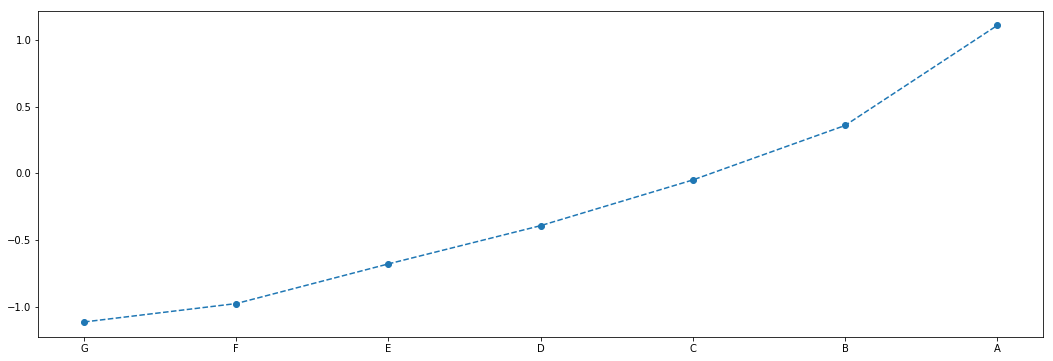

In [62]:
plot_woe(df_temp)

In [63]:
df_temp = woe_discrete(X_train, 'home_ownership', y_train)

In [64]:
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


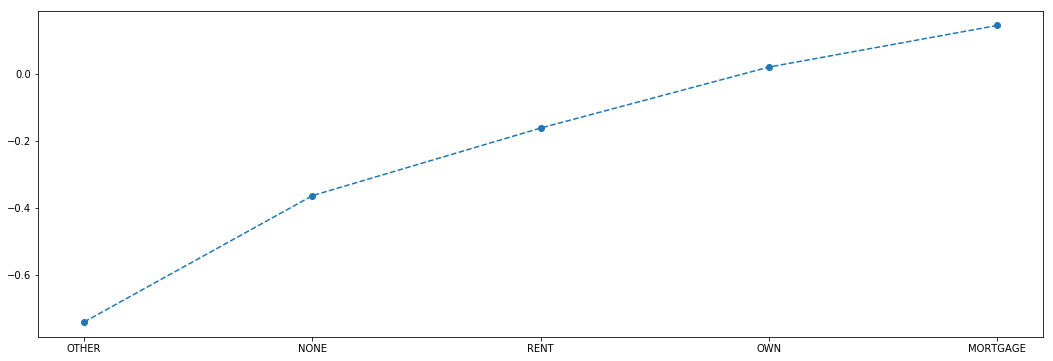

In [65]:
plot_woe(df_temp)

In [66]:
X_train['home_ownership:RENT_OTHER_NONE_ANY'] = sum([X_train['home_ownership:RENT'], X_train['home_ownership:OTHER'], 
                                                     X_train['home_ownership:NONE'], X_train['home_ownership:ANY']])

In [67]:
X_train['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [68]:
df_temp = woe_discrete(X_train, 'addr_state', y_train)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [69]:
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


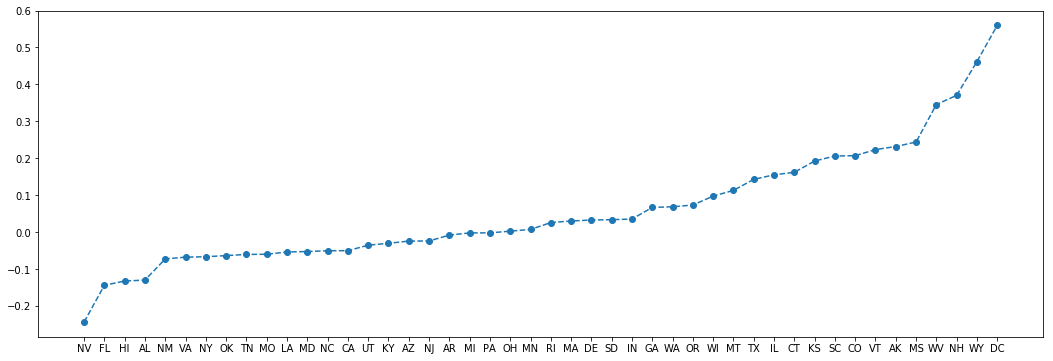

In [70]:
plot_woe(df_temp.iloc[2:-2,:])

In [71]:
X_train.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:VA', 'addr_state:VT', 'addr_state:WA', 'addr_state:WI',
       'addr_state:WV', 'addr_state:WY', 'initial_list_status:f',
       'initial_list_status:w', 'grade_categorical',
       'home_ownership:RENT_OTHER_NONE_ANY'],
      dtype='object', length=207)

In [72]:
if ['addr_state:ND'] in X_train.columns.values:
    pass
else:
    X_train['addr_state:ND'] = 0

In [73]:
X_train['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([X_train['addr_state:ND'], X_train['addr_state:NE'],
                                                         X_train['addr_state:IA'], X_train['addr_state:NV'],
                                                         X_train['addr_state:FL'], X_train['addr_state:HI'],
                                                         X_train['addr_state:AL']])

X_train['addr_state:NM_VA'] = sum([X_train['addr_state:NM'], X_train['addr_state:VA']])

X_train['addr_state:OK_TN_MO_LA_MD_NC'] = sum([X_train['addr_state:OK'], X_train['addr_state:TN'],
                                              X_train['addr_state:MO'], X_train['addr_state:LA'],
                                              X_train['addr_state:MD'], X_train['addr_state:NC']])

X_train['addr_state:UT_KY_AZ_NJ'] = sum([X_train['addr_state:UT'], X_train['addr_state:KY'],
                                              X_train['addr_state:AZ'], X_train['addr_state:NJ']])

X_train['addr_state:AR_MI_PA_OH_MN'] = sum([X_train['addr_state:AR'], X_train['addr_state:MI'],
                                              X_train['addr_state:PA'], X_train['addr_state:OH'],
                                              X_train['addr_state:MN']])

X_train['addr_state:RI_MA_DE_SD_IN'] = sum([X_train['addr_state:RI'], X_train['addr_state:MA'],
                                              X_train['addr_state:DE'], X_train['addr_state:SD'],
                                              X_train['addr_state:IN']])

X_train['addr_state:GA_WA_OR'] = sum([X_train['addr_state:GA'], X_train['addr_state:WA'],
                                              X_train['addr_state:OR']])

X_train['addr_state:WI_MT'] = sum([X_train['addr_state:WI'], X_train['addr_state:MT']])

X_train['addr_state:IL_CT'] = sum([X_train['addr_state:IL'], X_train['addr_state:CT']])

X_train['addr_state:KS_SC_CO_VT_AK_MS'] = sum([X_train['addr_state:KS'], X_train['addr_state:SC'],
                                              X_train['addr_state:CO'], X_train['addr_state:VT'],
                                              X_train['addr_state:AK'], X_train['addr_state:MS']])

X_train['addr_state:WV_NH_WY_DC_ME_ID'] = sum([X_train['addr_state:WV'], X_train['addr_state:NH'],
                                              X_train['addr_state:WY'], X_train['addr_state:DC'],
                                              X_train['addr_state:ME'], X_train['addr_state:ID']])

,verification_status,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


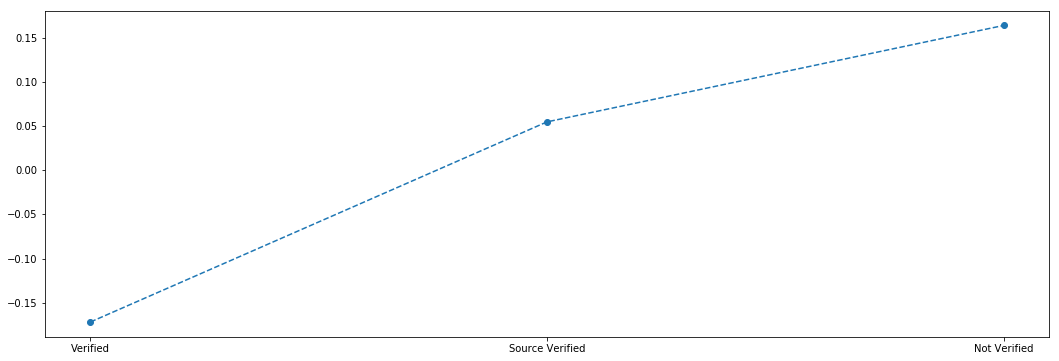

In [74]:
df_temp = woe_discrete(X_train, 'verification_status', y_train)
plot_woe(df_temp)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


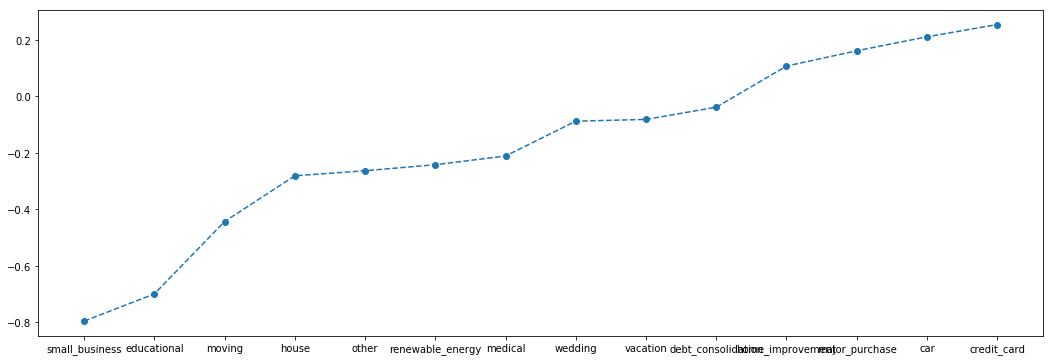

In [75]:
df_temp = woe_discrete(X_train, 'purpose', y_train)
plot_woe(df_temp)
df_temp

In [76]:
X_train['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([X_train['purpose:educational'], X_train['purpose:small_business'],
                                                                 X_train['purpose:wedding'], X_train['purpose:renewable_energy'],
                                                                 X_train['purpose:moving'], X_train['purpose:house']])
X_train['purpose:oth__med__vacation'] = sum([X_train['purpose:other'], X_train['purpose:medical'],
                                             X_train['purpose:vacation']])
X_train['purpose:major_purch__car__home_impr'] = sum([X_train['purpose:major_purchase'], X_train['purpose:car'],
                                                        X_train['purpose:home_improvement']])

,initial_list_status,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


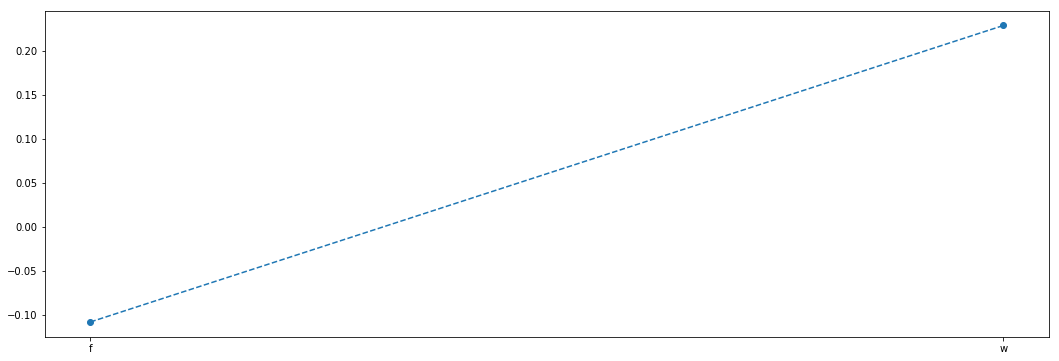

In [77]:
df_temp = woe_discrete(X_train, 'initial_list_status', y_train)
plot_woe(df_temp)
df_temp

In [78]:
def woe_ordered_continuous(df, discrete_var_name, good_bad_var_df):
    df = pd.concat([df[discrete_var_name], good_bad_var_df], axis=1)
    
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)

    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['num_good'] = df['prop_good']*df['n_obs']
    df['num_bad'] = (1-df['prop_good'])*df['n_obs']
    df['prop_num_good'] = df['num_good']/df['num_good'].sum()
    df['prop_num_bad'] = df['num_bad']/df['num_bad'].sum()
    df['WoE'] = np.log(df['prop_num_good']/df['prop_num_bad'])
#     df = df.sort_values(['WoE']).reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_num_good']-df['prop_num_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()

    return df

In [79]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [80]:
X_train['term'].unique()

array([36, 60])

,term,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


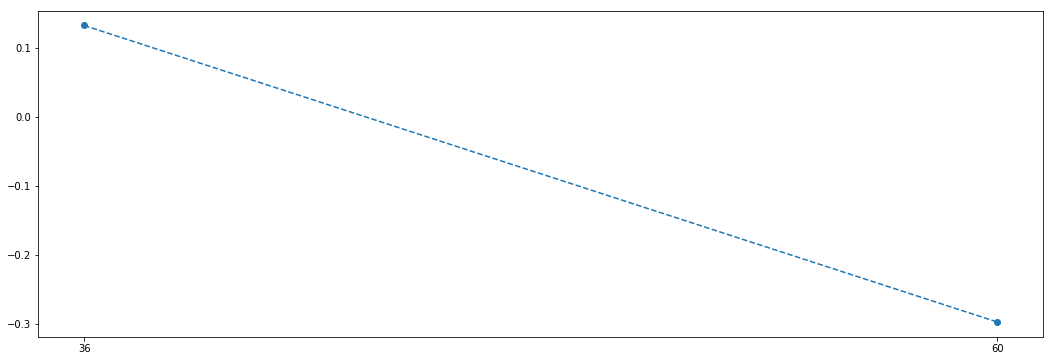

In [81]:
df_temp = woe_ordered_continuous(X_train, 'term', y_train)
plot_woe(df_temp)
df_temp

In [82]:
X_train['term:36'] = np.where((X_train['term']==36),1,0)
X_train['term:60'] = np.where((X_train['term']==60),1,0)

In [83]:
X_train['emp_length_int'].unique()

array([ 3,  6, 10,  7,  5,  0,  2,  9,  1,  8,  4])

,emp_length_int,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


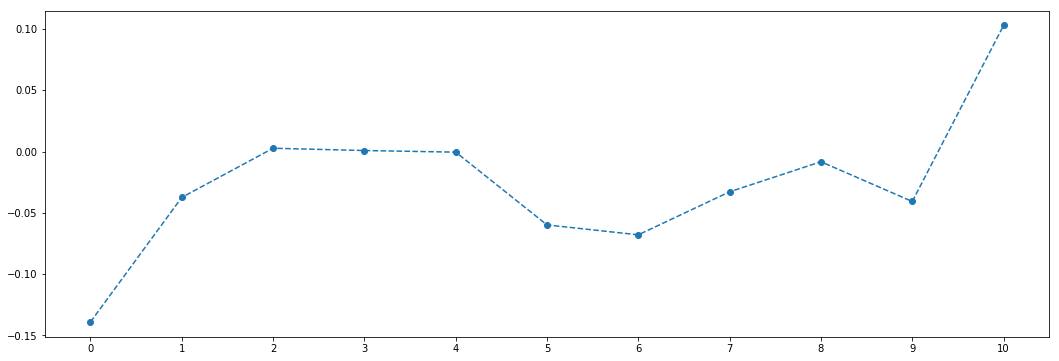

In [84]:
df_temp = woe_ordered_continuous(X_train, 'emp_length_int', y_train)
plot_woe(df_temp)
df_temp

In [85]:
X_train['emp_length:0'] = np.where(X_train['emp_length_int'].isin([0]),1,0)
X_train['emp_length:1'] = np.where(X_train['emp_length_int'].isin([1]),1,0)
X_train['emp_length:2-4'] = np.where(X_train['emp_length_int'].isin(range(2,5)),1,0)
X_train['emp_length:5-6'] = np.where(X_train['emp_length_int'].isin(range(5,7)),1,0)
X_train['emp_length:7-9'] = np.where(X_train['emp_length_int'].isin(range(7,10)),1,0)
X_train['emp_length:10'] = np.where(X_train['emp_length_int'].isin([10]),1,0)

In [86]:
X_train['months_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [87]:
X_train['months_since_issue_d_factor'] = pd.cut(X_train['months_since_issue_d'],50)
X_train['months_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
260400     (35.91, 37.8]
29626       (90.0, 91.8]
117003      (52.2, 54.0]
378696      (41.4, 43.2]
159555      (55.8, 57.6]
258931     (35.91, 37.8]
435023      (43.2, 45.0]
434939      (43.2, 45.0]
166714      (57.6, 59.4]
397514      (41.4, 43.2]
412695      (43.2, 45.0]
326791      (39.6, 41.4]
399112      (41.4, 43.2]
386208      (41.4, 43.2]
90207       (50.4, 52.2]
177298      (57.6, 59.4]
41491     (111.6, 113.4]
84297       (48.6, 50.4]
193825      (61.2, 63.0]
391693      (41.4, 43.2]
431675      (43.2, 45.0]
66434       (48.6, 50.4]
454638      (46.8, 48.6]
89746       (50.4, 52.2]
50163       (46.8, 48.6]
               ...      
214176      (64.8, 66.6]
235796     (35.91, 37.8]
103355      (50.4, 52.2]
267455     (35.91, 37.8]
199041      (61.2, 63.0]
252709     (35.91, 37.8]
327069      (39.6, 41.4]
194027      (61.2, 63.0]
321879      (39.6, 41.4]


,months_since_issue_d_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113186


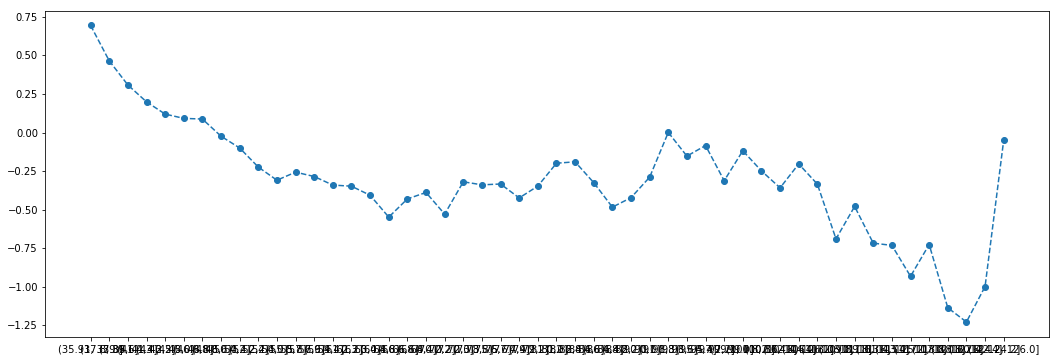

In [88]:
df_temp = woe_ordered_continuous(X_train, 'months_since_issue_d_factor', y_train)
plot_woe(df_temp)
df_temp

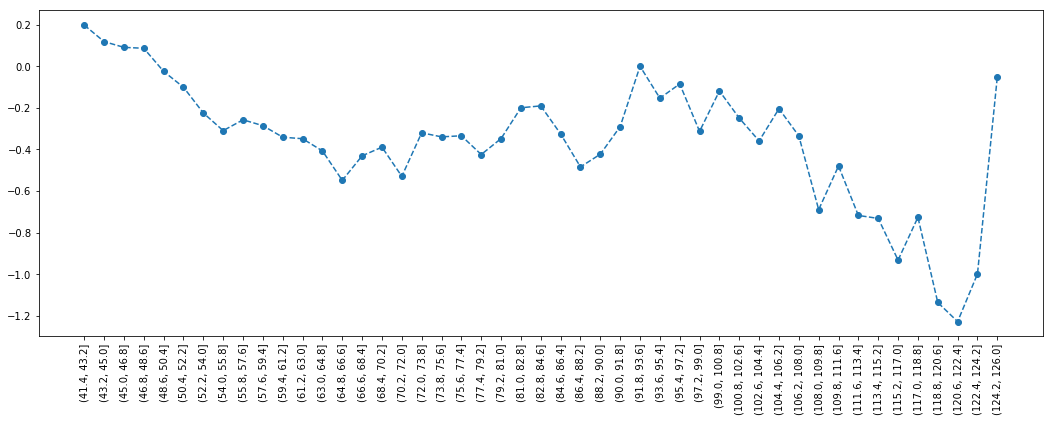

In [89]:
plot_woe(df_temp.iloc[3:,:],rotation=90)

In [90]:
X_train['mnths_since_issue_d:<38'] = np.where(X_train['mnths_since_issue_d'].isin(range(38)),1,0)
X_train['mnths_since_issue_d:38-39'] = np.where(X_train['mnths_since_issue_d'].isin(range(38,40)),1,0)
X_train['mnths_since_issue_d:40-41'] = np.where(X_train['mnths_since_issue_d'].isin(range(40,42)),1,0)
X_train['mnths_since_issue_d:42-48'] = np.where(X_train['mnths_since_issue_d'].isin(range(42,49)),1,0)
X_train['mnths_since_issue_d:49-52:'] = np.where(X_train['mnths_since_issue_d'].isin(range(49,53)),1,0)
X_train['mnths_since_issue_d:53-64'] = np.where(X_train['mnths_since_issue_d'].isin(range(53,65)),1,0)
X_train['mnths_since_issue_d:65-84'] = np.where(X_train['mnths_since_issue_d'].isin(range(65,85)),1,0)
X_train['mnths_since_issue_d:>84:'] = np.where(X_train['mnths_since_issue_d'].isin(range(85,126)),1,0)

In [91]:
X_train['int_rate_factor'] = pd.cut(X_train['int_rate'],50)
X_train['int_rate']

427211     8.90
206088    14.33
136020     8.90
412305    16.59
36159     12.84
260400     7.49
29626     10.62
117003    20.31
378696     9.17
159555    15.31
258931    16.49
435023     9.67
434939    15.31
166714    15.80
397514    13.65
412695    14.64
326791    22.15
399112    12.49
386208    10.15
90207     18.55
177298    11.14
41491     10.64
84297     15.10
193825    16.29
391693    17.57
431675    12.49
66434     13.67
454638    11.99
89746     16.20
50163     15.61
          ...  
214176    24.20
235796    10.49
103355    10.64
267455    14.49
199041    11.14
252709     9.49
327069     7.69
194027    19.05
321879    22.15
262913    18.99
64820     15.61
329365    18.24
41090     12.21
278167    14.49
191335    23.83
175203    17.27
388468    16.99
374871     9.17
87498      6.97
430410    23.43
137337    21.98
54886      7.62
207892    18.75
110268    20.31
119879    21.60
259178     8.67
365838    12.49
131932    14.09
146867    11.14
121958    11.55
Name: int_rate, Length: 

In [92]:
df_temp = woe_ordered_continuous(X_train, 'int_rate_factor', y_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


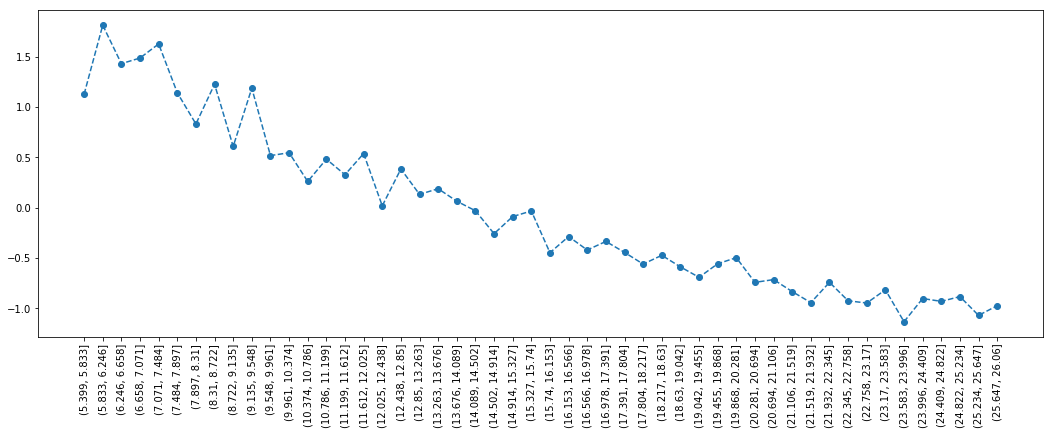

In [93]:
plot_woe(df_temp,rotation=90)

In [94]:
X_train['int_rate:<9.548'] = np.where((X_train['int_rate'] <= 9.548),1,0)
X_train['int_rate:.548-12.025'] = np.where((X_train['int_rate'] > 9.548) & (X_train['int_rate'] <= 12.025),1,0)
X_train['int_rate:12.025-15.74'] = np.where((X_train['int_rate'] > 12.025) & (X_train['int_rate'] <= 15.74),1,0)
X_train['int_rate:15.74-20.281'] = np.where((X_train['int_rate'] > 15.74) & (X_train['int_rate'] <= 20.281),1,0)
X_train['int_rate:>20.281:'] = np.where((X_train['int_rate'] > 20.281),1,0)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,months_since_earliest_cr_line,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,inf
1,73.0,2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,0.125000,inf,inf
2,74.0,7,1.000000,0.000019,7.0,0.0,0.000021,0.000000,inf,0.000000,NaN,inf
3,75.0,50,0.820000,0.000134,41.0,9.0,0.000123,0.000221,-0.581397,0.180000,inf,inf
4,76.0,87,0.873563,0.000233,76.0,11.0,0.000229,0.000270,-0.164907,0.053563,0.416491,inf
5,77.0,64,0.937500,0.000172,60.0,4.0,0.000181,0.000098,0.610305,0.063937,0.775212,inf
6,78.0,70,0.900000,0.000188,63.0,7.0,0.000190,0.000172,0.099480,0.037500,0.510826,inf
7,79.0,106,0.924528,0.000284,98.0,8.0,0.000295,0.000196,0.407781,0.024528,0.308301,inf
8,80.0,97,0.886598,0.000260,86.0,11.0,0.000259,0.000270,-0.041293,0.037930,0.449074,inf
9,81.0,125,0.936000,0.000335,117.0,8.0,0.000352,0.000196,0.584987,0.049402,0.626280,inf


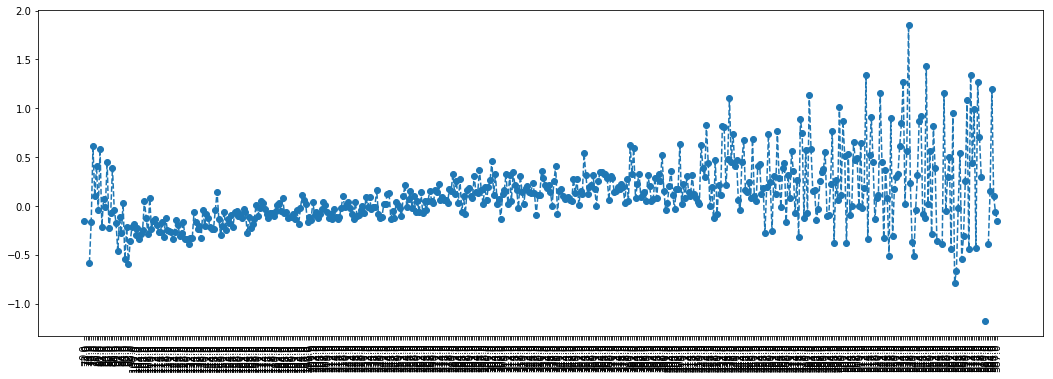

In [95]:
X_train['mths_since_earliest_cr_line_factor'] = pd.cut(X_train['months_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(X_train, 'months_since_earliest_cr_line', y_train)
plot_woe(df_temp, 90)
df_temp

In [96]:
X_train['mths_since_earliest_cr_line:<140'] = np.where(X_train['months_since_earliest_cr_line'].isin(range(140)), 1, 0)
X_train['mths_since_earliest_cr_line:141-164'] = np.where(X_train['months_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
X_train['mths_since_earliest_cr_line:165-247'] = np.where(X_train['months_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
X_train['mths_since_earliest_cr_line:248-270'] = np.where(X_train['months_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
X_train['mths_since_earliest_cr_line:271-352'] = np.where(X_train['months_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
X_train['mths_since_earliest_cr_line:>352'] = np.where(X_train['months_since_earliest_cr_line'].isin(range(353, int(X_train['months_since_earliest_cr_line'].max()))), 1, 0)

,delinq_2yrs,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


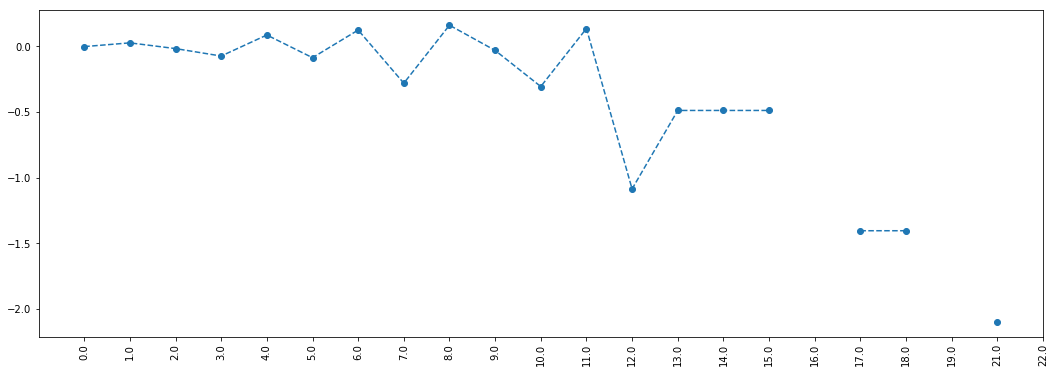

In [97]:
df_temp = woe_ordered_continuous(X_train, 'delinq_2yrs', y_train)
plot_woe(df_temp, 90)
df_temp

In [98]:
X_train['delinq_2yrs:0'] = np.where((X_train['delinq_2yrs'] == 0), 1, 0)
X_train['delinq_2yrs:1-3'] = np.where((X_train['delinq_2yrs'] >= 1) & (X_train['delinq_2yrs'] <= 3), 1, 0)
X_train['delinq_2yrs:>=4'] = np.where((X_train['delinq_2yrs'] >= 9), 1, 0)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


,inq_last_6mths,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


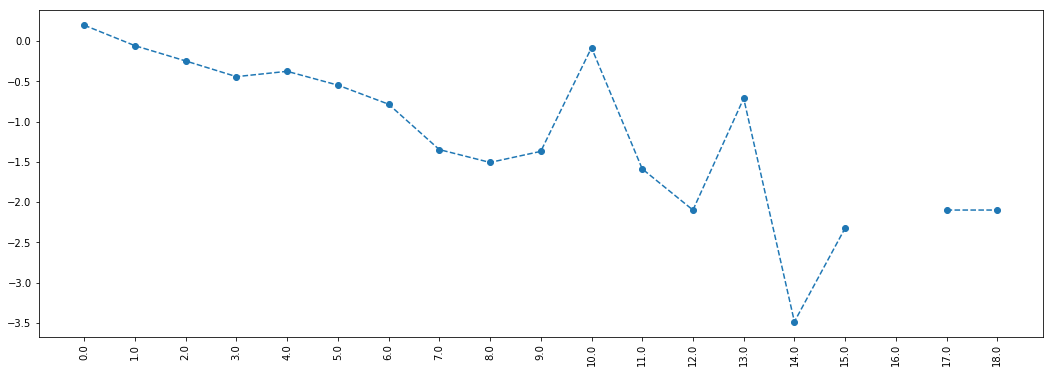

In [99]:
df_temp = woe_ordered_continuous(X_train, 'inq_last_6mths', y_train)
plot_woe(df_temp, 90)
df_temp

In [100]:
X_train['inq_last_6mths:0'] = np.where((X_train['inq_last_6mths'] == 0), 1, 0)
X_train['inq_last_6mths:1-2'] = np.where((X_train['inq_last_6mths'] >= 1) & (X_train['inq_last_6mths'] <= 2), 1, 0)
X_train['inq_last_6mths:3-6'] = np.where((X_train['inq_last_6mths'] >= 3) & (X_train['inq_last_6mths'] <= 6), 1, 0)
X_train['inq_last_6mths:>6'] = np.where((X_train['inq_last_6mths'] > 6), 1, 0)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


,open_acc,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.045711,0.005879,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.064986,0.017419,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.080239,0.008868,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.089730,0.003592,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.095787,-0.015204,0.001838,0.018796,inf


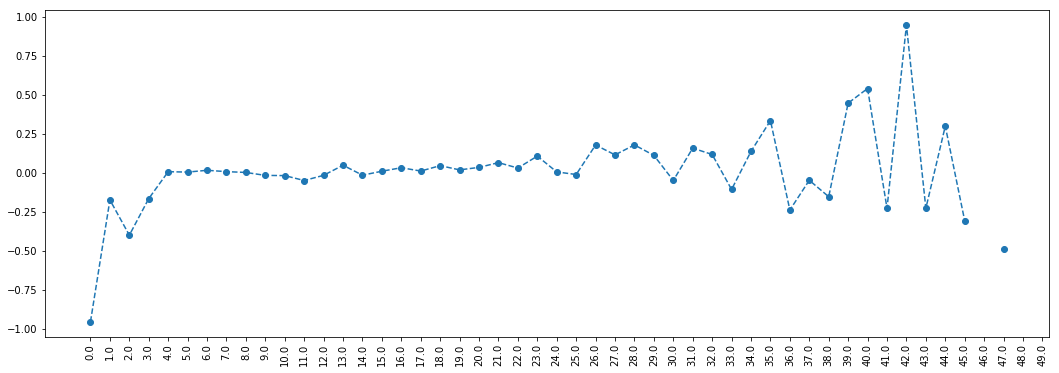

In [101]:
df_temp = woe_ordered_continuous(X_train, 'open_acc', y_train)
plot_woe(df_temp, 90)
df_temp

In [102]:
X_train['open_acc:0'] = np.where((X_train['open_acc'] == 0), 1, 0)
X_train['open_acc:1-3'] = np.where((X_train['open_acc'] >= 1) & (X_train['open_acc'] <= 3), 1, 0)
X_train['open_acc:4-12'] = np.where((X_train['open_acc'] >= 4) & (X_train['open_acc'] <= 12), 1, 0)
X_train['open_acc:13-17'] = np.where((X_train['open_acc'] >= 13) & (X_train['open_acc'] <= 17), 1, 0)
X_train['open_acc:18-22'] = np.where((X_train['open_acc'] >= 18) & (X_train['open_acc'] <= 22), 1, 0)
X_train['open_acc:23-25'] = np.where((X_train['open_acc'] >= 23) & (X_train['open_acc'] <= 25), 1, 0)
X_train['open_acc:26-30'] = np.where((X_train['open_acc'] >= 26) & (X_train['open_acc'] <= 30), 1, 0)
X_train['open_acc:>=31'] = np.where((X_train['open_acc'] >= 31), 1, 0)

,pub_rec,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


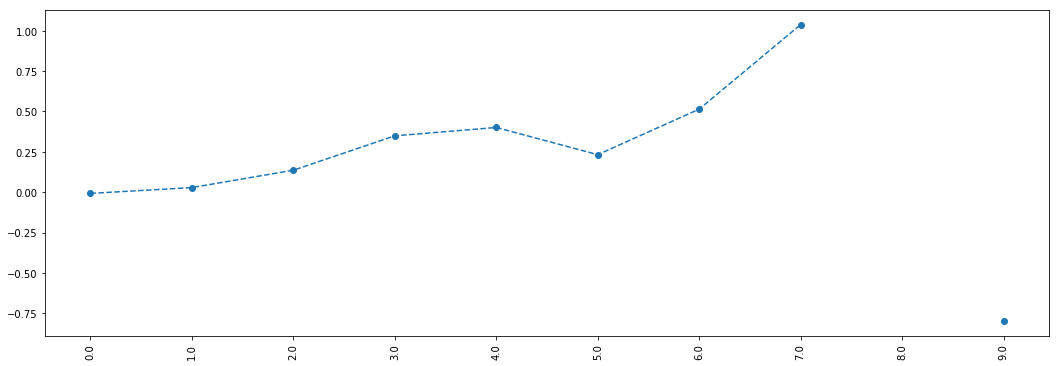

In [103]:
df_temp = woe_ordered_continuous(X_train, 'pub_rec', y_train)
plot_woe(df_temp, 90)
df_temp

In [104]:
X_train['pub_rec:0-2'] = np.where((X_train['pub_rec'] >= 0) & (X_train['pub_rec'] <= 2), 1, 0)
X_train['pub_rec:3-4'] = np.where((X_train['pub_rec'] >= 3) & (X_train['pub_rec'] <= 4), 1, 0)
X_train['pub_rec:>=5'] = np.where((X_train['pub_rec'] >= 5), 1, 0)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,NaN,NaN,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,0.054299,0.402388,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,0.008374,0.073555,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,0.008152,0.075703,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,0.000001,0.000011,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,0.005986,0.058505,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,0.001112,0.011073,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,0.005337,0.054022,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,0.003950,0.041499,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,0.003661,0.039725,inf


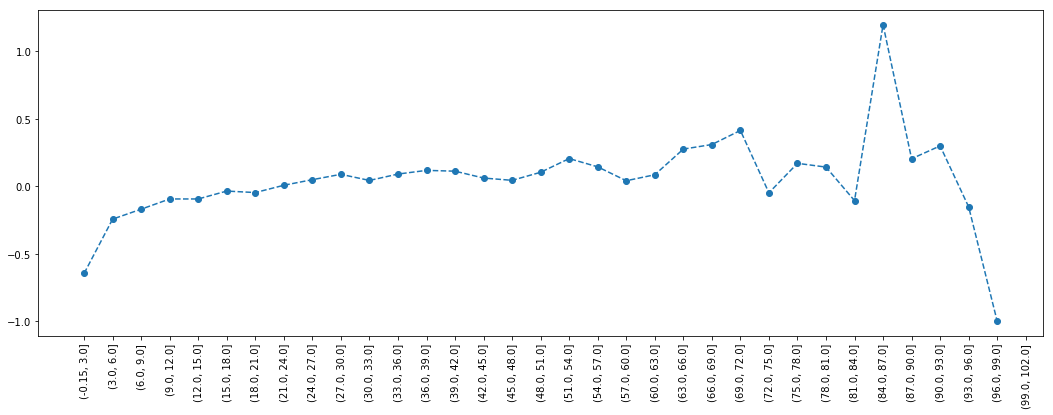

In [105]:
X_train['total_acc_factor'] = pd.cut(X_train['total_acc'], 50)
df_temp = woe_ordered_continuous(X_train, 'total_acc_factor', y_train)
plot_woe(df_temp, 90)
df_temp

In [106]:
X_train['total_acc:<=27'] = np.where((X_train['total_acc'] <= 27), 1, 0)
X_train['total_acc:28-51'] = np.where((X_train['total_acc'] >= 28) & (X_train['total_acc'] <= 51), 1, 0)
X_train['total_acc:>=52'] = np.where((X_train['total_acc'] >= 52), 1, 0)

,acc_now_delinq,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


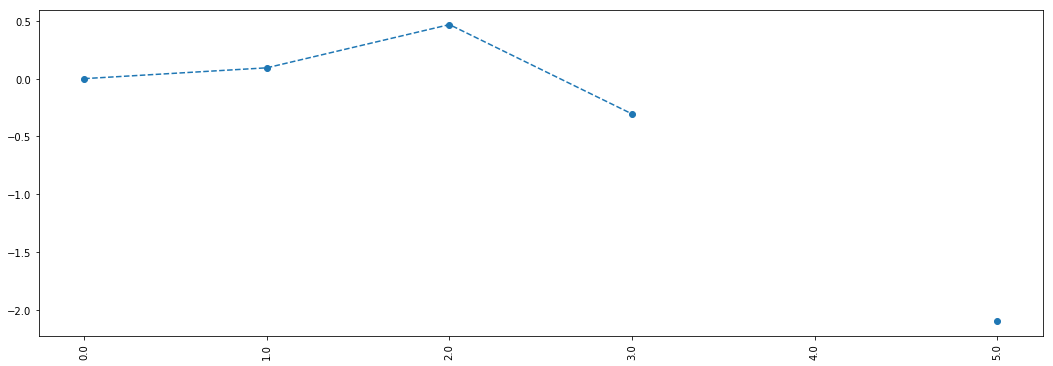

In [107]:
df_temp = woe_ordered_continuous(X_train, 'acc_now_delinq', y_train)
plot_woe(df_temp, 90)
df_temp

In [108]:
X_train['acc_now_delinq:0'] = np.where((X_train['acc_now_delinq'] == 0), 1, 0)
X_train['acc_now_delinq:>=1'] = np.where((X_train['acc_now_delinq'] >= 1), 1, 0)

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",10011,0.878334,0.031608,8793.0,1218.0,0.030885,0.038038,-0.208309,NaN,NaN,inf
1,"(5000.0, 9999.999]",36042,0.884440,0.113796,31877.0,4165.0,0.111966,0.130071,-0.149886,0.006107,0.058423,inf
2,"(9999.999, 14999.998]",46249,0.886765,0.146023,41012.0,5237.0,0.144052,0.163549,-0.126939,0.002325,0.022947,inf
3,"(14999.998, 19999.998]",43941,0.887986,0.138736,39019.0,4922.0,0.137052,0.153712,-0.114721,0.001221,0.012218,inf
4,"(19999.998, 24999.997]",36634,0.894524,0.115665,32770.0,3864.0,0.115102,0.120671,-0.047244,0.006538,0.067477,inf
5,"(24999.997, 29999.997]",29756,0.895416,0.093949,26644.0,3112.0,0.093585,0.097186,-0.037756,0.000892,0.009488,inf
6,"(29999.997, 34999.996]",23505,0.899000,0.074213,21131.0,2374.0,0.074221,0.074139,0.001110,0.003584,0.038866,inf
7,"(34999.996, 39999.996]",18613,0.910117,0.058767,16940.0,1673.0,0.059501,0.052247,0.130005,0.011116,0.128894,inf
8,"(39999.996, 44999.996]",14719,0.914396,0.046473,13459.0,1260.0,0.047274,0.039349,0.183482,0.004280,0.053477,inf
9,"(44999.996, 49999.995]",11585,0.911869,0.036578,10564.0,1021.0,0.037105,0.031885,0.151615,0.002528,0.031867,inf


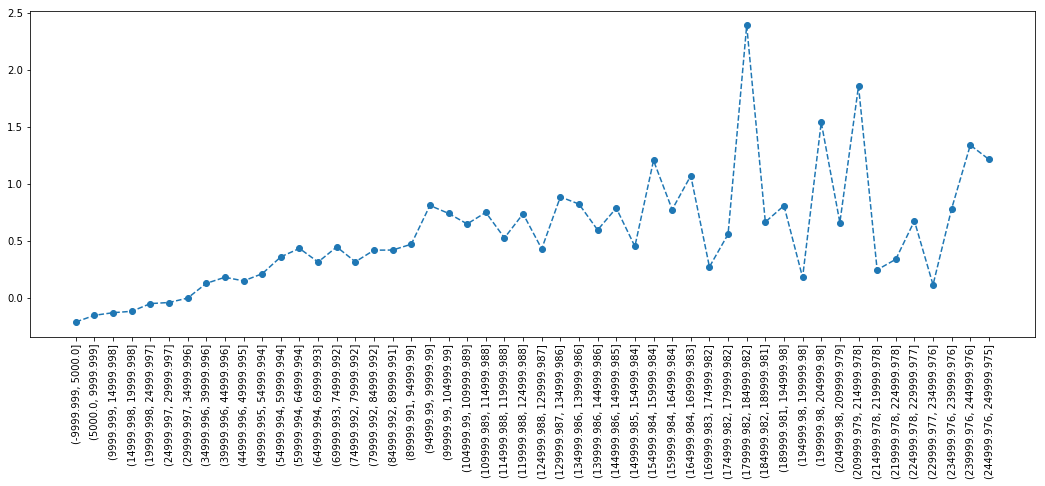

In [109]:
X_train['total_rev_hi_lim_factor'] = pd.cut(X_train['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(X_train, 'total_rev_hi_lim_factor', y_train)
plot_woe(df_temp.iloc[: 50, : ], 90)
df_temp

In [110]:
X_train['total_rev_hi_lim:<=5K'] = np.where((X_train['total_rev_hi_lim'] <= 5000), 1, 0)
X_train['total_rev_hi_lim:5K-10K'] = np.where((X_train['total_rev_hi_lim'] > 5000) & (X_train['total_rev_hi_lim'] <= 10000), 1, 0)
X_train['total_rev_hi_lim:10K-20K'] = np.where((X_train['total_rev_hi_lim'] > 10000) & (X_train['total_rev_hi_lim'] <= 20000), 1, 0)
X_train['total_rev_hi_lim:20K-30K'] = np.where((X_train['total_rev_hi_lim'] > 20000) & (X_train['total_rev_hi_lim'] <= 30000), 1, 0)
X_train['total_rev_hi_lim:30K-40K'] = np.where((X_train['total_rev_hi_lim'] > 30000) & (X_train['total_rev_hi_lim'] <= 40000), 1, 0)
X_train['total_rev_hi_lim:40K-55K'] = np.where((X_train['total_rev_hi_lim'] > 40000) & (X_train['total_rev_hi_lim'] <= 55000), 1, 0)
X_train['total_rev_hi_lim:55K-95K'] = np.where((X_train['total_rev_hi_lim'] > 55000) & (X_train['total_rev_hi_lim'] <= 95000), 1, 0)
X_train['total_rev_hi_lim:>95K'] = np.where((X_train['total_rev_hi_lim'] > 95000), 1, 0)

In [111]:
X_train['annual_inc_factor'] = pd.cut(X_train['annual_inc'], 50)
df_temp = woe_ordered_continuous(X_train, 'annual_inc_factor', y_train)
df_temp

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,NaN,NaN,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,0.036871,0.442440,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,0.005055,0.075651,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,0.009267,0.153002,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,0.055830,0.717100,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,0.008379,0.084362,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,0.082051,1.523053,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


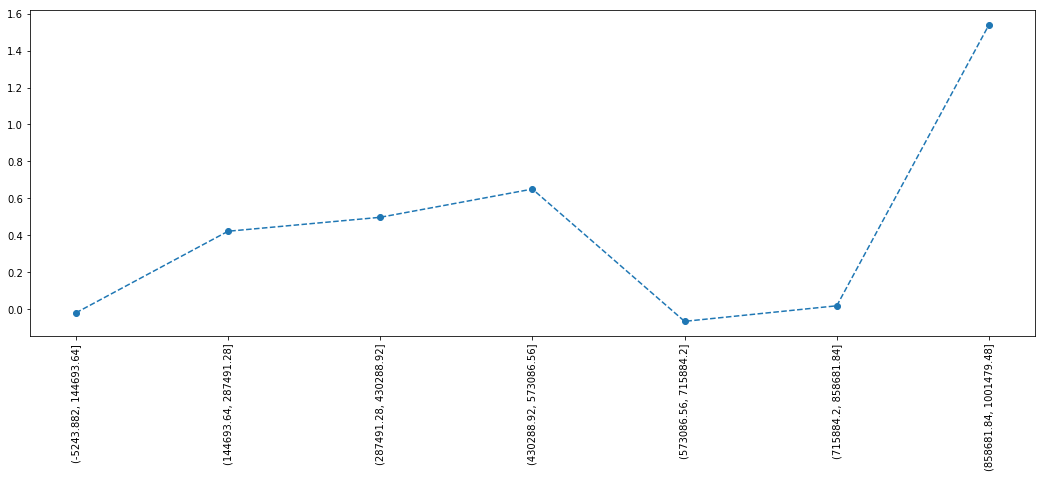

In [112]:
plot_woe(df_temp, 90)

In [113]:
X_train_temp = X_train.loc[X_train['annual_inc'] <= 140000,:]
X_train_temp

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,months_since_earliest_cr_line,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,grade_categorical,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d_factor,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52:,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84:,int_rate_factor,int_rate_factor:<9.548,int_rate_factor:.548-12.025,int_rate_factor:12.025-15.74,int_rate_factor:15.74-20.

In [114]:
X_train['annual_inc_factor'] = pd.cut(X_train_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(X_train_temp, 'annual_inc_factor', y_train[X_train_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 144693.64]",351062,0.888524,1.0,311927.0,39135.0,1.0,1.0,0.0,NaN,NaN,0.0
1,"(144693.64, 287491.28]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,"(287491.28, 430288.92]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,"(430288.92, 573086.56]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,"(573086.56, 715884.2]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,"(715884.2, 858681.84]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,"(858681.84, 1001479.48]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,"(1001479.48, 1144277.12]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,"(1144277.12, 1287074.76]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,"(1287074.76, 1429872.4]",0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


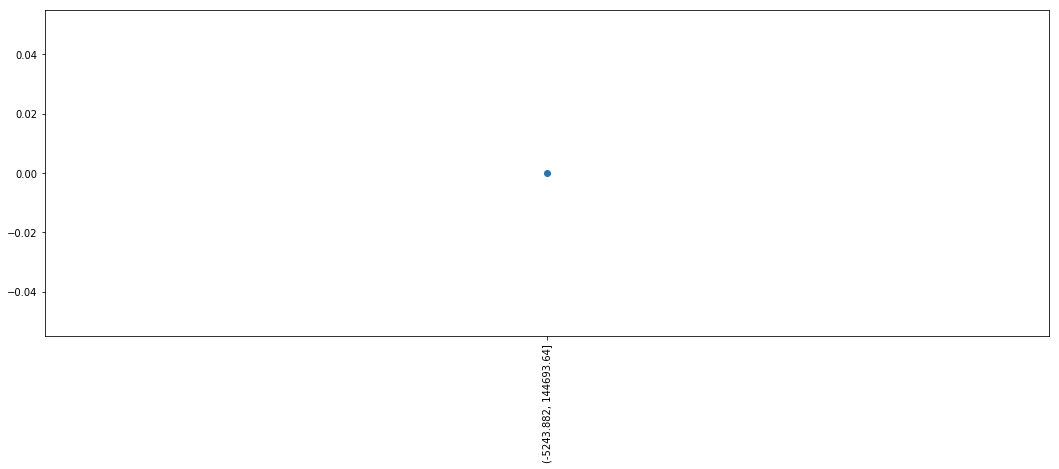

In [115]:
plot_woe(df_temp, 90)

In [116]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
X_train['annual_inc:<20K'] = np.where((X_train['annual_inc'] <= 20000), 1, 0)
X_train['annual_inc:20K-30K'] = np.where((X_train['annual_inc'] > 20000) & (X_train['annual_inc'] <= 30000), 1, 0)
X_train['annual_inc:30K-40K'] = np.where((X_train['annual_inc'] > 30000) & (X_train['annual_inc'] <= 40000), 1, 0)
X_train['annual_inc:40K-50K'] = np.where((X_train['annual_inc'] > 40000) & (X_train['annual_inc'] <= 50000), 1, 0)
X_train['annual_inc:50K-60K'] = np.where((X_train['annual_inc'] > 50000) & (X_train['annual_inc'] <= 60000), 1, 0)
X_train['annual_inc:60K-70K'] = np.where((X_train['annual_inc'] > 60000) & (X_train['annual_inc'] <= 70000), 1, 0)
X_train['annual_inc:70K-80K'] = np.where((X_train['annual_inc'] > 70000) & (X_train['annual_inc'] <= 80000), 1, 0)
X_train['annual_inc:80K-90K'] = np.where((X_train['annual_inc'] > 80000) & (X_train['annual_inc'] <= 90000), 1, 0)
X_train['annual_inc:90K-100K'] = np.where((X_train['annual_inc'] > 90000) & (X_train['annual_inc'] <= 100000), 1, 0)
X_train['annual_inc:100K-120K'] = np.where((X_train['annual_inc'] > 100000) & (X_train['annual_inc'] <= 120000), 1, 0)
X_train['annual_inc:120K-140K'] = np.where((X_train['annual_inc'] > 120000) & (X_train['annual_inc'] <= 140000), 1, 0)
X_train['annual_inc:>140K'] = np.where((X_train['annual_inc'] > 140000), 1, 0)

In [117]:
X_train_temp = X_train[pd.notnull(X_train['mths_since_last_delinq'])]
X_train_temp['mths_since_last_delinq_factor'] = pd.cut(X_train_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(X_train_temp, 'mths_since_last_delinq_factor', y_train[X_train_temp.index])
df_temp

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,NaN,NaN,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,0.016097,0.152164,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,0.005215,0.053372,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,0.003983,0.040967,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,0.006087,0.063147,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,0.002227,0.023470,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,0.003592,0.038062,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,0.001223,0.013085,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,0.007115,0.078141,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,0.004794,0.053184,inf


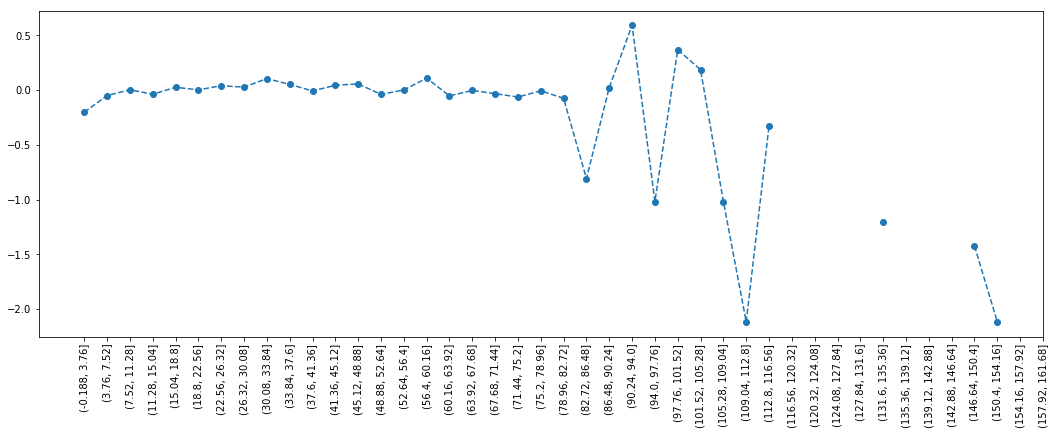

In [118]:
plot_woe(df_temp, 90)

In [119]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
X_train['mths_since_last_delinq:Missing'] = np.where((X_train['mths_since_last_delinq'].isnull()), 1, 0)
X_train['mths_since_last_delinq:0-3'] = np.where((X_train['mths_since_last_delinq'] >= 0) & (X_train['mths_since_last_delinq'] <= 3), 1, 0)
X_train['mths_since_last_delinq:4-30'] = np.where((X_train['mths_since_last_delinq'] >= 4) & (X_train['mths_since_last_delinq'] <= 30), 1, 0)
X_train['mths_since_last_delinq:31-56'] = np.where((X_train['mths_since_last_delinq'] >= 31) & (X_train['mths_since_last_delinq'] <= 56), 1, 0)
X_train['mths_since_last_delinq:>=57'] = np.where((X_train['mths_since_last_delinq'] >= 57), 1, 0)

In [120]:
X_train['dti_factor'] = pd.cut(X_train['dti'], 100)
df_temp = woe_ordered_continuous(X_train, 'dti_factor', y_train)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",745,0.876510,0.001997,653.0,92.0,0.001965,0.002256,-0.137956,NaN,NaN,0.028446
1,"(0.4, 0.8]",808,0.919554,0.002166,743.0,65.0,0.002236,0.001594,0.338564,0.043044,0.476520,0.028446
2,"(0.8, 1.2]",922,0.896963,0.002472,827.0,95.0,0.002489,0.002330,0.066183,0.022591,0.272381,0.028446
3,"(1.2, 1.6]",1043,0.896453,0.002796,935.0,108.0,0.002814,0.002648,0.060670,0.000511,0.005513,0.028446
4,"(1.6, 2.0]",1172,0.902730,0.003142,1058.0,114.0,0.003184,0.002796,0.130192,0.006278,0.069522,0.028446
5,"(2.0, 2.399]",1337,0.916978,0.003584,1226.0,111.0,0.003690,0.002722,0.304237,0.014248,0.174045,0.028446
6,"(2.399, 2.799]",1538,0.916125,0.004123,1409.0,129.0,0.004241,0.003163,0.293078,0.000853,0.011159,0.028446
7,"(2.799, 3.199]",1696,0.904481,0.004547,1534.0,162.0,0.004617,0.003973,0.150293,0.011644,0.142785,0.028446
8,"(3.199, 3.599]",1927,0.900363,0.005166,1735.0,192.0,0.005222,0.004708,0.103522,0.004118,0.046770,0.028446
9,"(3.599, 3.999]",2197,0.914429,0.005890,2009.0,188.0,0.006047,0.004610,0.271205,0.014066,0.167683,0.028446


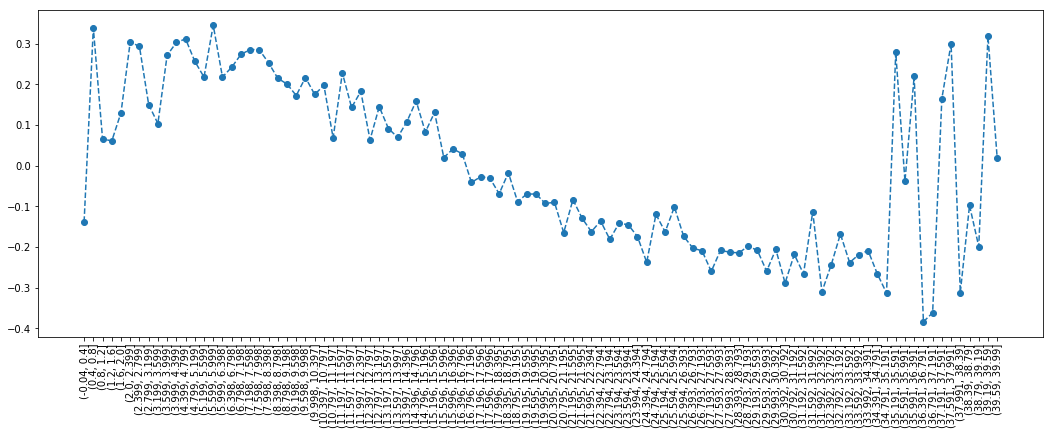

In [121]:
plot_woe(df_temp, 90)

In [122]:
X_train_temp = X_train.loc[X_train['dti'] <= 35, : ]
X_train_temp['dti_factor'] = pd.cut(X_train_temp['dti'], 50)
df_temp = woe_ordered_continuous(X_train_temp, 'dti_factor', y_train[X_train_temp.index])
df_temp

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dti_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1366,0.894583,0.003690,1222.0,144.0,0.003707,0.003560,0.040465,NaN,NaN,0.027289
1,"(0.7, 1.4]",1664,0.893029,0.004496,1486.0,178.0,0.004507,0.004400,0.024094,0.001554,0.016371,0.027289
2,"(1.4, 2.1]",1986,0.912890,0.005365,1813.0,173.0,0.005499,0.004276,0.251481,0.019861,0.227387,0.027289
3,"(2.1, 2.8]",2594,0.913261,0.007008,2369.0,225.0,0.007186,0.005562,0.256157,0.000371,0.004676,0.027289
4,"(2.8, 3.5]",3135,0.903030,0.008470,2831.0,304.0,0.008587,0.007515,0.133392,0.010231,0.122765,0.027289
5,"(3.5, 4.2]",3844,0.915713,0.010385,3520.0,324.0,0.010677,0.008009,0.287507,0.012682,0.154115,0.027289
6,"(4.2, 4.9]",4595,0.914037,0.012414,4200.0,395.0,0.012739,0.009764,0.265988,0.001676,0.021519,0.027289
7,"(4.9, 5.6]",5312,0.912651,0.014351,4848.0,464.0,0.014705,0.011470,0.248471,0.001386,0.017517,0.027289
8,"(5.6, 6.3]",5927,0.914797,0.016013,5422.0,505.0,0.016446,0.012483,0.275696,0.002146,0.027225,0.027289
9,"(6.3, 7.0]",6482,0.911601,0.017512,5909.0,573.0,0.017923,0.014164,0.235381,0.003195,0.040315,0.027289


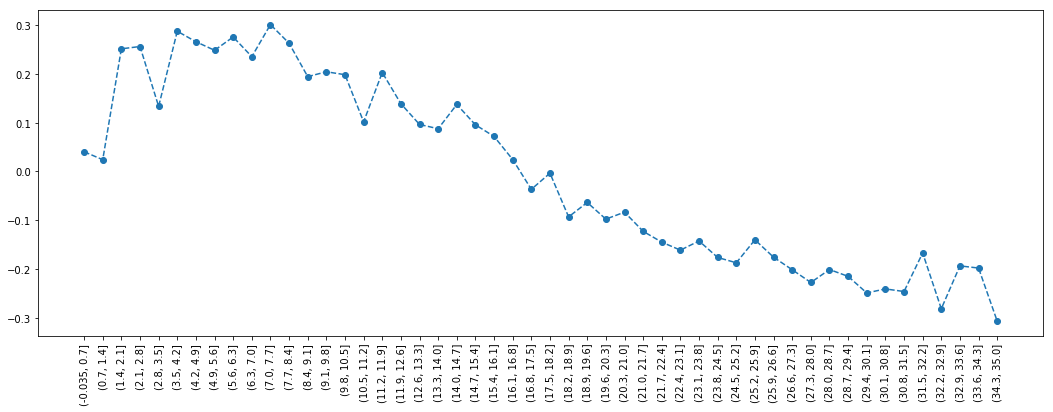

In [123]:
plot_woe(df_temp, 90)

In [124]:
# Categories:
X_train['dti:<=1.4'] = np.where((X_train['dti'] <= 1.4), 1, 0)
X_train['dti:1.4-3.5'] = np.where((X_train['dti'] > 1.4) & (X_train['dti'] <= 3.5), 1, 0)
X_train['dti:3.5-7.7'] = np.where((X_train['dti'] > 3.5) & (X_train['dti'] <= 7.7), 1, 0)
X_train['dti:7.7-10.5'] = np.where((X_train['dti'] > 7.7) & (X_train['dti'] <= 10.5), 1, 0)
X_train['dti:10.5-16.1'] = np.where((X_train['dti'] > 10.5) & (X_train['dti'] <= 16.1), 1, 0)
X_train['dti:16.1-20.3'] = np.where((X_train['dti'] > 16.1) & (X_train['dti'] <= 20.3), 1, 0)
X_train['dti:20.3-21.7'] = np.where((X_train['dti'] > 20.3) & (X_train['dti'] <= 21.7), 1, 0)
X_train['dti:21.7-22.4'] = np.where((X_train['dti'] > 21.7) & (X_train['dti'] <= 22.4), 1, 0)
X_train['dti:22.4-35'] = np.where((X_train['dti'] > 22.4) & (X_train['dti'] <= 35), 1, 0)
X_train['dti:>35'] = np.where((X_train['dti'] > 35), 1, 0)

In [125]:
X_train_temp = X_train[pd.notnull(X_train['mths_since_last_record'])]
X_train_temp['mths_since_last_record_factor'] = pd.cut(X_train_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(X_train_temp, 'mths_since_last_record_factor', y_train[X_train_temp.index])
df_temp

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1086,0.764273,0.021691,830.0,256.0,0.018569,0.047672,-0.942830,NaN,NaN,0.080659
1,"(2.42, 4.84]",76,0.894737,0.001518,68.0,8.0,0.001521,0.001490,0.020988,0.130464,0.963818,0.080659
2,"(4.84, 7.26]",163,0.914110,0.003256,149.0,14.0,0.003334,0.002607,0.245810,0.019374,0.224823,0.080659
3,"(7.26, 9.68]",156,0.903846,0.003116,141.0,15.0,0.003155,0.002793,0.121631,0.010264,0.124179,0.080659
4,"(9.68, 12.1]",292,0.907534,0.005832,265.0,27.0,0.005929,0.005028,0.164814,0.003688,0.043183,0.080659
5,"(12.1, 14.52]",207,0.917874,0.004134,190.0,17.0,0.004251,0.003166,0.294732,0.010340,0.129918,0.080659
6,"(14.52, 16.94]",210,0.928571,0.004194,195.0,15.0,0.004363,0.002793,0.445871,0.010697,0.151139,0.080659
7,"(16.94, 19.36]",334,0.907186,0.006671,303.0,31.0,0.006779,0.005773,0.160667,0.021386,0.285204,0.080659
8,"(19.36, 21.78]",283,0.936396,0.005652,265.0,18.0,0.005929,0.003352,0.570280,0.029210,0.409612,0.080659
9,"(21.78, 24.2]",455,0.898901,0.009088,409.0,46.0,0.009151,0.008566,0.065995,0.037495,0.504284,0.080659


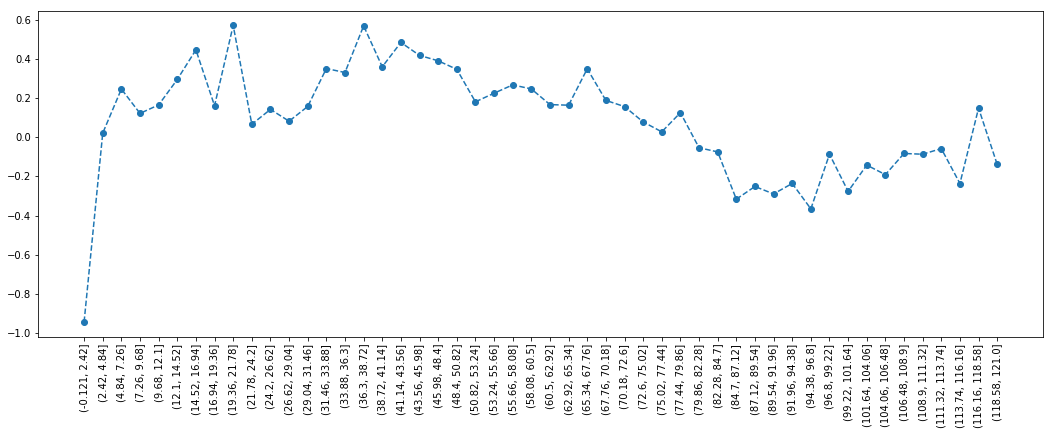

In [126]:
plot_woe(df_temp, 90)

In [127]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
X_train['mths_since_last_record:Missing'] = np.where((X_train['mths_since_last_record'].isnull()), 1, 0)
X_train['mths_since_last_record:0-2'] = np.where((X_train['mths_since_last_record'] >= 0) & (X_train['mths_since_last_record'] <= 2), 1, 0)
X_train['mths_since_last_record:3-20'] = np.where((X_train['mths_since_last_record'] >= 3) & (X_train['mths_since_last_record'] <= 20), 1, 0)
X_train['mths_since_last_record:21-31'] = np.where((X_train['mths_since_last_record'] >= 21) & (X_train['mths_since_last_record'] <= 31), 1, 0)
X_train['mths_since_last_record:32-80'] = np.where((X_train['mths_since_last_record'] >= 32) & (X_train['mths_since_last_record'] <= 80), 1, 0)
X_train['mths_since_last_record:81-86'] = np.where((X_train['mths_since_last_record'] >= 81) & (X_train['mths_since_last_record'] <= 86), 1, 0)
X_train['mths_since_last_record:>86'] = np.where((X_train['mths_since_last_record'] > 86), 1, 0)

In [128]:
train_input = X_train
train_output = y_train

In [129]:
print(len(train_input)/len(df['good_bad']), len(train_output)/len(df['good_bad']))
train_input.to_csv('train_input.csv')
train_output.to_csv('train_output.csv')

0.8 0.8


/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
# test_input = X_train
# test_output = y_train

In [131]:
# print(len(test_input)/len(df['good_bad']), len(test_output)/len(df['good_bad']))
# test_input.to_csv('test_input.csv')
# test_output.to_csv('test_output.csv')

In [158]:
train_input_with_ref = train_input.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

/Users/osamaqureshi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [159]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [160]:
X_train = train_input_with_ref.drop(ref_categories, axis=1)

In [161]:
X_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,NaN
206088,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,NaN
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,NaN
36159,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,NaN


In [163]:
train_input.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,months_since_earliest_cr_line,months_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,grade_categorical,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d_factor,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52:,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84:,int_rate_factor,int_rate_factor:<9.548,int_rate_factor:.548-12.025,int_rate_factor:12.025-15.74,int_rate_factor:15.74-20.